# Histogramas

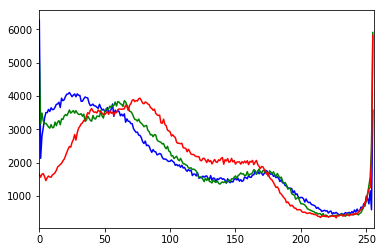

In [2]:
#tip_01_01.py
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("dataset/examples/Holy-Grail.jpg")
cv2.imshow("dataset/examples/Holy-Grail.jpg", img)
cv2.waitKey(0)
color = ('b', 'g', 'r')

for i, c in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=c)
    plt.xlim([0, 256])

plt.show()

cv2.destroyAllWindows()


# Ecualización

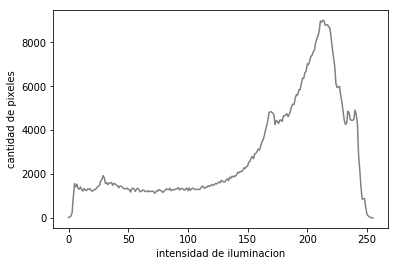

In [3]:
#tip_01_02_a.py
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("dataset/examples/life-of-brian2.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow('Always look on the bright side of life', img)
cv2.waitKey(0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='gray')

plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

cv2.destroyAllWindows()


# Ecualización adaptativa

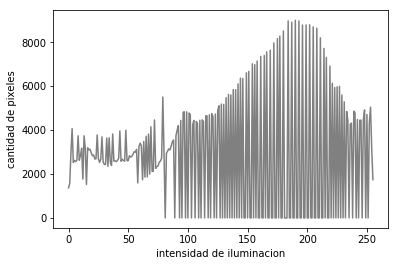

In [4]:
#tip_01_02_b.py
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

# Ecualizacion de histogramas
img = cv2.imread("dataset/examples/life-of-brian2.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.equalizeHist(img)

cv2.imshow('Histogramas', img)
cv2.waitKey(0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='gray')

plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

cv2.destroyAllWindows()

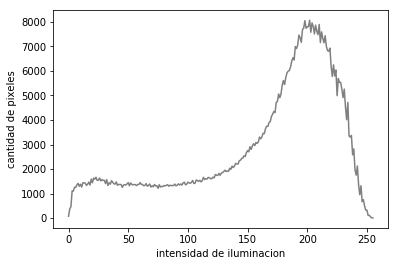

In [1]:
#tip_01_02_c.py
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

# Ecualizacion de histograma adaptativo

img = cv2.imread("dataset/examples/life-of-brian2.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow('Always look on the bright side of life', img)
cv2.waitKey(0)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img = clahe.apply(img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='gray')
cv2.imshow('Always look on the bright side of life', img)
cv2.waitKey(0)

plt.xlabel('intensidad de iluminacion')
plt.ylabel('cantidad de pixeles')
plt.show()

cv2.destroyAllWindows()


In [1]:
#tip_01_02_d.py
import cv2

# Ecualizacion de histograma adaptativo

img = cv2.imread("dataset/examples/life-of-brian2.jpg", 1)
cv2.imshow("Always look on the bright side of life", img)
cv2.waitKey(0)
# -----Converting image to LAB Color model-----------------------------------
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2.imshow("lab", lab)
cv2.waitKey(0)
# -----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
cv2.imshow('l_channel', l)
cv2.waitKey(0)
cv2.imshow('a_channel', a)
cv2.waitKey(0)
cv2.imshow('b_channel', b)
cv2.waitKey(0)

# -----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
cl = clahe.apply(l)
cv2.imshow('CLAHE output', cl)
cv2.waitKey(0)
# -----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl, a, b))
cv2.imshow('limg', limg)
cv2.waitKey(0)
# -----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
cv2.imshow('final', final)
cv2.waitKey(0)

cv2.destroyAllWindows()

NameError: name 'final' is not defined

Continuara....